Import library

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette="muted")
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


## Terms to know for audio in digital form:
Frequency (Hz):
- Frequency describes the diffrence of wave lengths
- We interpreate frquency has high and low pitches


## Reading in Audio files

In [36]:
audio_files = glob("/home/anhndv/vanh_ws/DCASE2025Task4/data/dev_set/test/soundscape/*.wav")

In [37]:
# Play audio file 
ipd.Audio(audio_files[0], autoplay=True)

In [46]:
y, sr = librosa.load(audio_files[0], sr=None)
print(f"y: {y[:10]} \ny_shape: {y.shape} \nsr: {sr}  ")

y: [-0.00150299 -0.00158691 -0.0015564  -0.0016861  -0.00174713 -0.00187683
 -0.00132751 -0.00152588 -0.00141144 -0.00126648] 
y_shape: (320000,) 
sr: 32000  


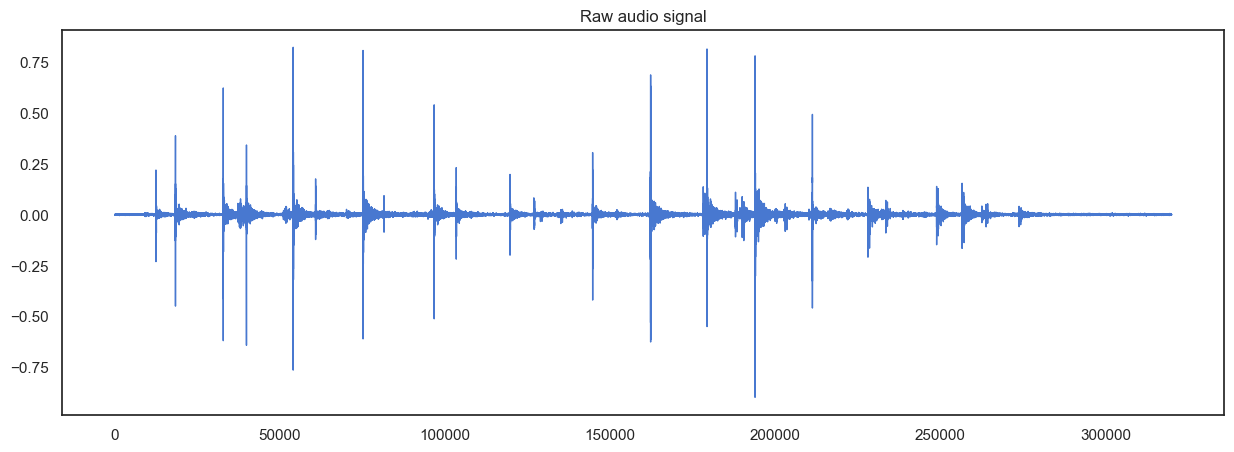

In [58]:
pd.Series(y).plot(figsize=(15, 5), 
                  lw=1,
                  title="Raw audio signal",
                  color=color_pal[0])
plt.show()

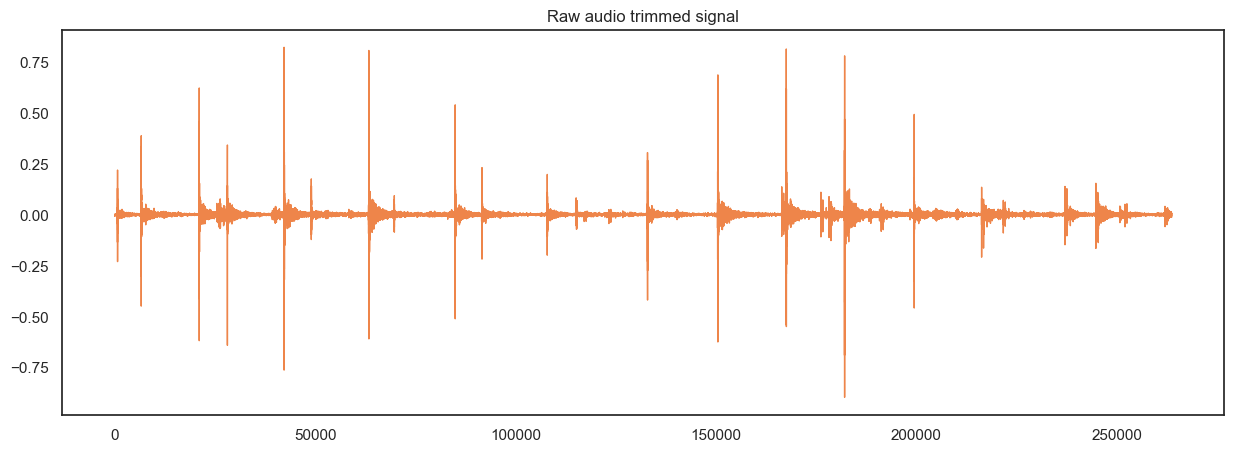

In [62]:
y_trimmed, _ = librosa.effects.trim(y, top_db=20)

pd.Series(y_trimmed).plot(figsize=(15, 5), 
                  lw=1,
                  title="Raw audio trimmed signal",
                  color=color_pal[1])
plt.show()

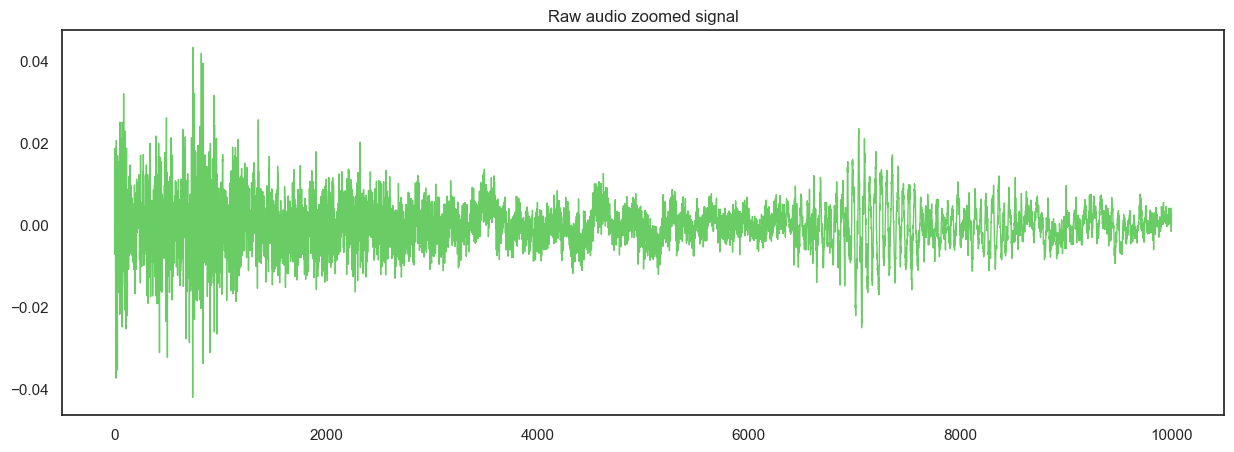

In [66]:
pd.Series(y[145000:155000]).plot(figsize=(15, 5), 
                  lw=1,
                  title="Raw audio zoomed signal",
                  color=color_pal[2])
plt.show()

### Spectoram

In [69]:
D = librosa.stft(y)
S_sb = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_sb.shape

(1025, 626)

<function matplotlib.pyplot.show(close=None, block=None)>

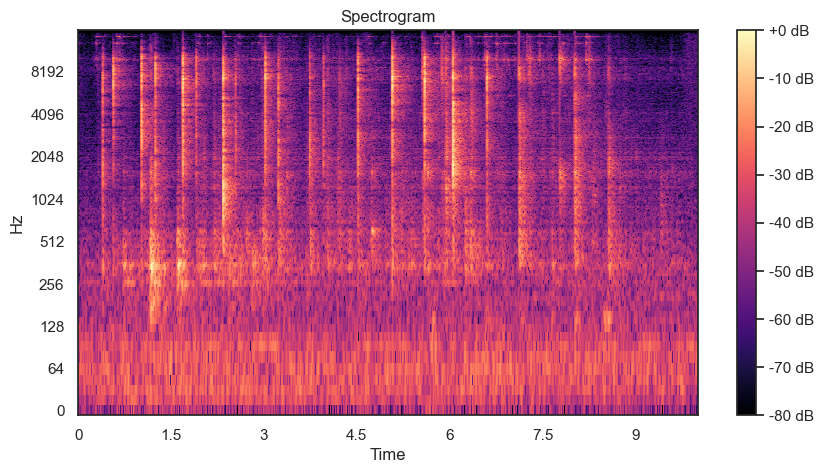

In [75]:
#Plot the transformed spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_sb,
                            x_axis='time',
                            y_axis='log',
                            sr=sr,
                            ax=ax,)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show

### Mel spectogram

In [ ]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)               

S_db_mel = librosa.amplitude_to_db(np.abs(S), ref=np.max)

In [ ]:
#Plot the transformed mel spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_sb,
                            x_axis='time',
                            y_axis='log',
                            sr=sr,
                            ax=ax,)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show

Draw waveform and spectrogram of audio

/tmp/ipykernel_5609/2946251138.py:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio), ref=np.max), sr=sr, x_axis='time', y_axis='log')


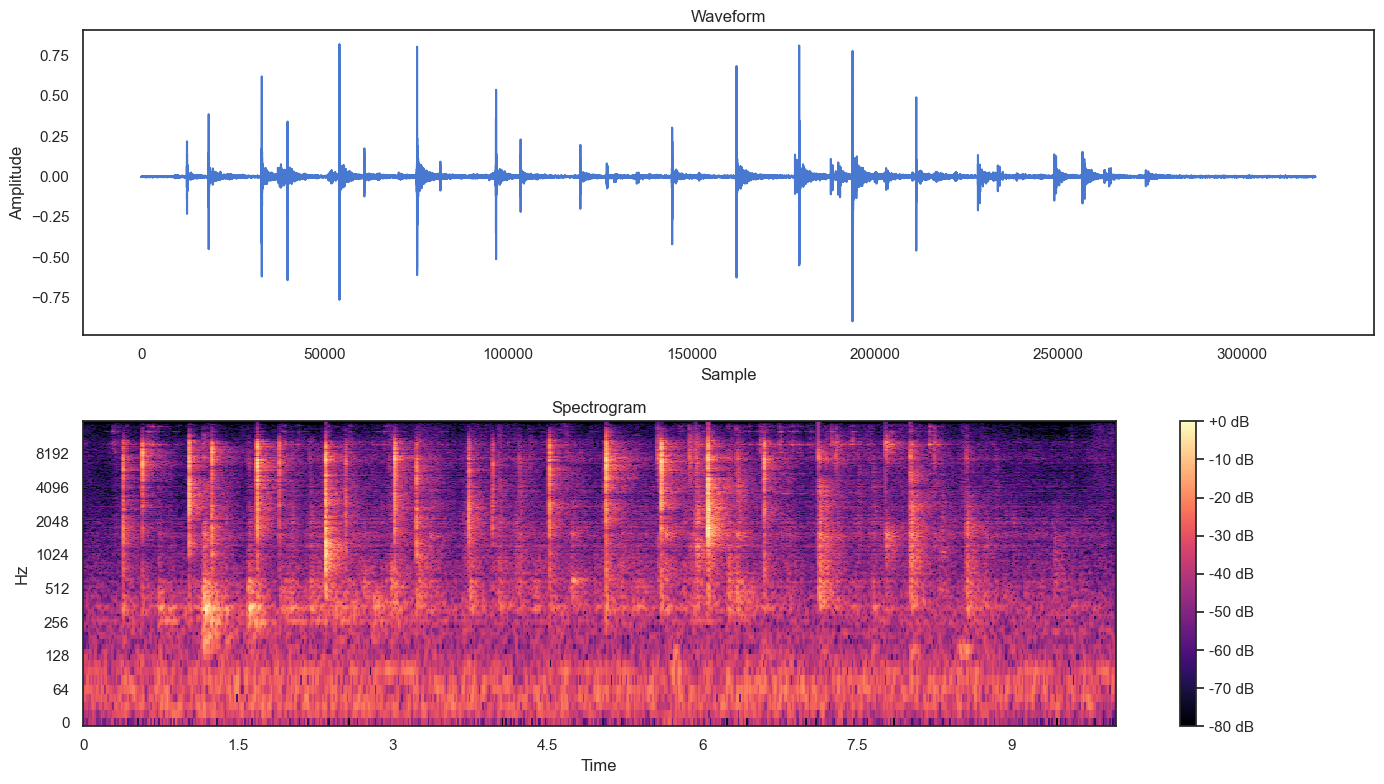

In [71]:
audio, sr = librosa.load(audio_files[0], sr=None)
plt.figure(figsize=(14, 8))

# Plot waveform
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(audio), ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [21]:
print("Audio shape:", audio.shape)

Audio shape: (320000,)


In [25]:
import soundfile as sf

data, sr = sf.read(file_path)
print("Shape of data:", data.shape)  # (samples, channels) if multi-channel
print("Number of channels:", data.shape[1] if data.ndim > 1 else 1)

Shape of data: (320000, 4)
Number of channels: 4


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Đọc file wav
sr, data = wavfile.read(file_path)
print(f"Shape of data: {data.shape}")
print(f"Sample rate: {sr} Hz")

# Nếu data là int, chuyển về float [-1, 1] để dễ vẽ
if data.dtype != np.float32 and data.dtype != np.float64:
    data = data.astype(np.float32) / np.iinfo(data.dtype).max


Shape of data: (320000, 4)
Sample rate: 32000 Hz
